### **Логистическая регрессия**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

При использовании линейной регресси мы пытаемся объяснить с помощью нашей модели действительное число. При классификации мы пытаемся объяснить нашей модели какую-то категорию

In [ ]:
x = np.linspace(-5, 5, 100)

Функция numpy.linspace() в Python используется для генерации последовательности чисел в линейном пространстве с одинаковым размером шага.

In [ ]:
y = 0.3 * x + np.random.normal(size=100)
y = y > 0

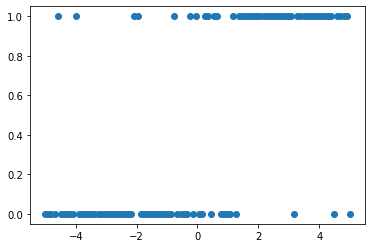

In [ ]:
plt.scatter(x, y)

Построй график функции 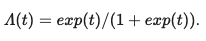


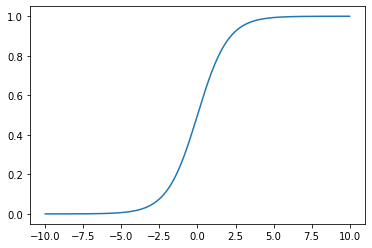

In [ ]:
x = np.linspace(-10, 10, 300)
y = np.exp(x) / (1 + np.exp(x))
plt.plot(x, y)

Это функция распределения логистической случайной величины. И она как раз будет S - образной(сигмоида) 


*   Логистическое распределение: логистическая регрессия(логит - модель)
*   Нормальное распределение: пробит-модель


Попробуем обучить модель линейной регрессии и построим сигмоиду по функции с коэффициентами из полученной модели

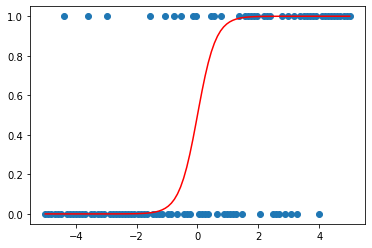

In [ ]:
from sklearn.linear_model import LinearRegression

x = np.linspace(-5, 5, 100)
y = 0.3 * x + np.random.normal(size=100)
y = y > 0

model = LinearRegression()
model.fit(y.reshape(-1, 1), x.reshape(-1, 1))

sigm = lambda xs : np.exp(xs) / (1 + np.exp(xs))

xs = np.linspace(-5, 5, 100)
plt.plot(xs, sigm(model.coef_[0][0] * xs), color='red')
plt.scatter(x, y)

### **Как выглядит модель?**

- x - регрессоры (объясняющие переменные)
- $y \in \{0, 1\}$ - целевая переменная
-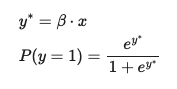

In [ ]:
beta = 0.5 # коэф из модели, оценили по данным
x = 10 # некое значение
_y = beta * x
sigm(_y) # вероятность того что y = 1

0.9933071490757152

Дальше мы выбираем по каким-то правилам порог. По умолчанию 0.5

In [ ]:
tr = 0.5
1 * (sigm(_y) > 0.5) # если значение больше, чем 0.5, то 1  иначе 0

1

Смысл $\beta$:
$ \ln(P(y=1) / P(y=0)) = \beta x$
- $ \beta = 0.5$ => при увеличении х на единицу, логарифм шансов меняется на $\beta$
 - Как оценить модель?
 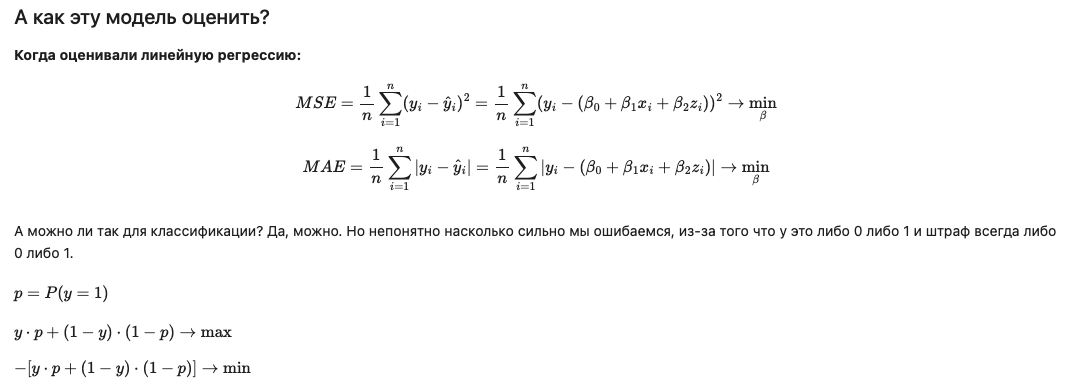

Последние три строки это  часть logloss, ошибка которая завязана на вероятность

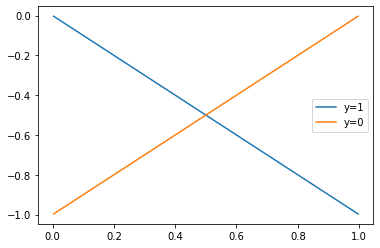

In [ ]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -p, label='y=1')
plt.plot(p, -(1-p), label='y=0')
plt.legend();

Теперь добавим логарифм, чтобы штраф был сильнее в местах, где мы меньше уверенны, добавим логарифм: 
$$
-1 \cdot (\ln(p) \cdot y + \ln(1 - p) \cdot (1 - y)) \to min
$$

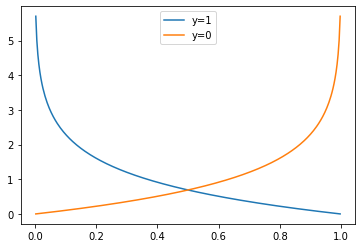

In [ ]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -np.log(p), label='y=1')
plt.plot(p, -np.log(1-p), label='y=0')
plt.legend();

Спрогнозируем, что-нибудь

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logic_regression/pokemon.csv')

In [ ]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


1. Загрузи данные по покемонам, `pokemon.csv`. Сколько всего наблюдений? Переменных?

2. Посмотри на описательные статистики. В каких пределах лежат `attack`, `defense` и `speed`?

3. Построй гистограммы силы атаки для легендарных и нелегандарных покемонов на одном графике. 

4. Построй аналогичные два графика для силы защиты и скорости. На каждом графике должны быть наложены две гистограммы: для легендарных и нелегендарных покемонов. 

5. Оцени параметры логистической регрессии:

$$P(legendary_i=1|attack_i, defense_i, speed_i)=\Lambda(\beta_1 + \beta_2 attack_i +\beta_3 defense_i +\beta_4 speed_i)$$

6. Оцени вероятность покемона с атакой 60, защитой 70 и скоростью 140 быть легендарным с помощью найденных тобой $\hat\beta_1$, $\hat\beta_2$, $\hat\beta_3$, $\hat\beta_4$.

In [13]:
X = data[['attack', 'defense', 'speed', 'is_legendary']]
X.describe() # выводит общую информацию по датасету

,attack,defense,speed,is_legendary
count,801.000000,801.000000,801.000000,801.000000
mean,77.857678,73.008739,66.334582,0.087391
std,32.158820,30.769159,28.907662,0.282583
min,5.000000,5.000000,5.000000,0.000000
25%,55.000000,50.000000,45.000000,0.000000
50%,75.000000,70.000000,65.000000,0.000000
75%,100.000000,90.000000,85.000000,0.000000
max,185.000000,230.000000,180.000000,1.000000


Видно, что медиана(50%) от среднего(mean) не сильно отличается это значит, что выбросов нет.

Построим гистограммы:

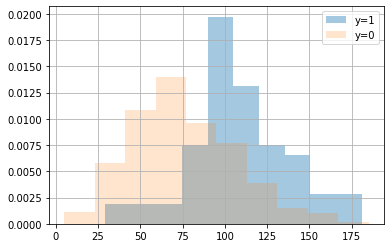

In [12]:
X[X.is_legendary == 1]['attack'].hist(bins=10, alpha=0.4, density=True, label='y=1') # вытаскивем значения атаки только для легендарных покемонов
# bins - кол-во столбиков
X[X.is_legendary == 0]['attack'].hist(bins=10, alpha=0.2, density=True, label='y=0')
plt.legend()

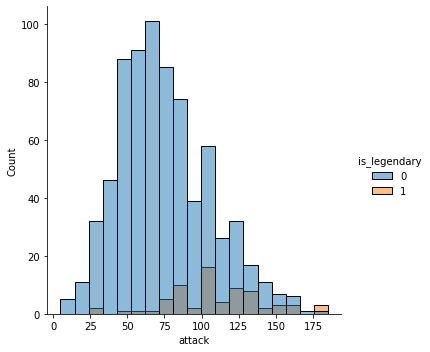

In [ ]:
#Построим по-пацански
import seaborn as sns
sns.displot(data=X, x='attack', hue='is_legendary')

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X = data[['attack', 'defense', 'speed', 'is_legendary']]
y = X.is_legendary.values
X = X.drop('is_legendary', axis=1).values

# stratify следит чтобы разбиение было одинаковым в плане пропорции единичек
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

С учетом регуляризации: 
$$
-1 \cdot [\ln(p) \cdot y  + \ln(1 - p) \cdot (1 - y)] + \frac{1}{C} \cdot \sum \beta_k^2 \to \min
$$

In [19]:
model = LogisticRegression(C=1e+10) # в функции обратный закон, поэтому ставим большой коэффициент регуляризации, чтобы избавиться от регуляризации
model.fit(X_train, y_train)
model.coef_

array([[0.01294576, 0.03517911, 0.04405116]])

In [23]:
new_pok = pd.DataFrame({'attack': [60, 20], 'defense': [70, 50], 'speed': [140, 220]})
new_pok

,attack,defense,speed
0,60,70,140
1,20,50,220


In [25]:
model.predict_proba(new_pok) 
# 1 столбик - вероятность не легендарности
# 2 стобик - вероятность легендарности

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.71832323, 0.28167677],
       [0.26617072, 0.73382928]])

In [27]:
model.predict(new_pok) # 1 покемон - не легендарный, 2 - легендарный

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 1])

In [28]:
from sklearn.metrics import roc_auc_score

p_test = model.predict_proba(X_test)[:, -1]
roc_auc_score(y_test, p_test)

0.8785228377065111


*   y = 1    P(y = 1) = 0.8    P(y = 1) = 0.4 хорошо: 0.8 > 0.5

*   y = 0    P(y = 1) = 0.5    P(y = 1) = 0.8 нехорошо: 0.4 !> 0.8

          
- Давайте возьмём из выборки все пары из y=1 и y=0 
- Дальше мы можем посмотреть сколько в выборке пар "хорошо" 
- roc_auc - доля пар "хорошо"

# Метрики классификации

## Метрики, которые зависят от значения порога

Решение будем принимать по такому правилу: если $\hat{p} = P(y=1 | x) \ge t$, тогда прогнозируем $\hat y = 1$. Иначе $\hat y = 0$.

Какой порог выбрать? 

$t = 0.3,$
$t = 0.5,$
$t = 0.7$

In [2]:
p = np.array([0.8,0.6,0.5,0.7,0.1,0.3])
y = np.array([1,1,1,0,1,0])

In [4]:
t = 0.3
y_hat = 1 * (p >= t)
print(y_hat)
print(y)

[1 1 1 1 0 1]
[1 1 1 0 1 0]


Accuracy - доля правильно данных ответов

In [6]:
np.mean(y == y_hat)

0.5

Эта метрика плоха тем, что она чувствительна к дисбалансу нулей и единичек. 

- $100$ больных
- $100000$ здоровых 

Если я скажу, что все здоровы, метрика __accuracy__ будет зашкаливать, хотя при этом больных искать я не научился

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat)

0.5

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat)

array([[0, 2],
       [1, 3]])

По столбцам отложены $\hat{y}$, а по строкам $y$

#PR-кривая 

In [15]:
np.mean(y_train)

0.0875

In [16]:
np.mean(y_test)

0.08695652173913043

In [17]:
np.sum(y_test)

14

In [21]:
p_hat = model.predict_proba(X_test)[:,-1]
t = 0.3
y_hat = p_hat >= t

In [22]:
accuracy_score(y_test, y_hat)

0.9006211180124224

In [24]:
y_zero_hat = np.zeros_like(y_test) # вектор из нулей по размерам такой же как и y_test

In [25]:
accuracy_score(y_test, y_zero_hat)

0.9130434782608695

# Матрица ошибок, полнота и точность

In [35]:
p_hat = model.predict_proba(X_test)[:,-1]
t = 0.5
y_hat = 1 * (p_hat > t)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_hat, y_test)

array([[147,  14],
       [  0,   0]])

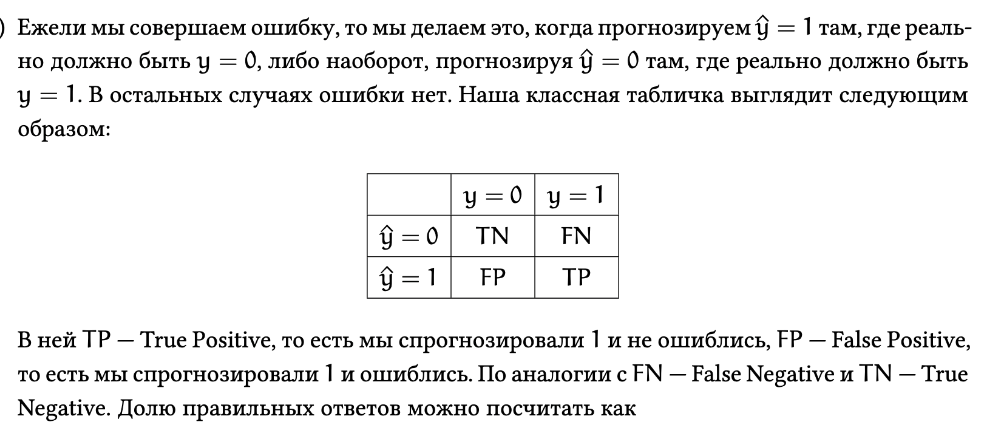

Recall ( сколько в принципе единиц из существующих я нашел):
$ Recall =\frac{TP}{TP + FN}$
Precision ( насколько точно я нахожу единицы)
$ Precision =\frac{TP}{TP + FP}$

In [37]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y_test, y_hat))
print(precision_score(y_test, y_hat))

0.14285714285714285
0.5


Мы можем менять порог и метрики пересчитываются, давайте попробуем его перебрать от 0 до 1 с каким-то шагом и построить картинку $(pr, rc)$

In [39]:
from sklearn.metrics import precision_recall_curve
pr, rc, trec = precision_recall_curve(y_test, p_hat)

Text(0, 0.5, 'Precision')

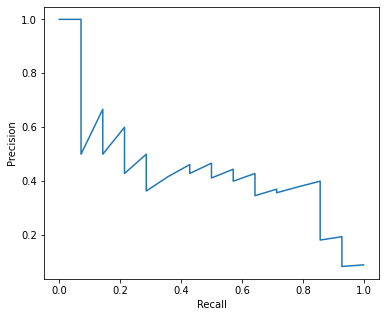

In [42]:
plt.figure(figsize=(6, 5))
plt.plot(rc, pr)
plt.xlabel('Recall')
plt.ylabel('Precision')

Как принять решение? 
- можно сказать, что хотим максимальную точность при ограничениях на полноту
$ \max(tr) (precision \mid recall > 0.4)$

In [45]:
ind = np.where(pr == pr[rc > 0.4].max())
pr[ind][0], rc[ind][0], trec[ind][0]

(0.4666666666666667, 0.5, 0.24760465831735728)

Можно пытаться накладывать ограничения на Precision, либо другие штуки